In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense,Dropout,SimpleRNN,LSTM,GRU
from keras.models import Sequential
from tensorflow import keras

In [2]:
# Load your dataset
# Assuming your dataset has columns 'datetime', 'total_visitor', 'total_accomodation'
# Adjust the file path accordingly

data = pd.read_csv('KepRiau 2015 - 2022.csv')

# Convert 'datetime' column to datetime type
data['datetime'] = pd.to_datetime(data['datetime'])

# Set 'datetime' column as index
data.set_index('datetime', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# Define your input and output variables
X = data_scaled[:, 1]  # 'total_accomodation' as input
y = data_scaled[:, 0]  # 'total_visitor' as output



TEST SIZE 80: 20

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [4]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [5]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=2)



Epoch 1/50

3/3 - 2s - loss: 0.3037 - val_loss: 0.0283 - 2s/epoch - 777ms/step
Epoch 2/50
3/3 - 0s - loss: 0.2599 - val_loss: 0.0254 - 41ms/epoch - 14ms/step
Epoch 3/50
3/3 - 0s - loss: 0.2221 - val_loss: 0.0318 - 58ms/epoch - 19ms/step
Epoch 4/50
3/3 - 0s - loss: 0.1886 - val_loss: 0.0472 - 64ms/epoch - 21ms/step
Epoch 5/50
3/3 - 0s - loss: 0.1600 - val_loss: 0.0704 - 72ms/epoch - 24ms/step
Epoch 6/50
3/3 - 0s - loss: 0.1353 - val_loss: 0.1000 - 64ms/epoch - 21ms/step
Epoch 7/50
3/3 - 0s - loss: 0.1181 - val_loss: 0.1355 - 60ms/epoch - 20ms/step
Epoch 8/50
3/3 - 0s - loss: 0.1028 - val_loss: 0.1738 - 56ms/epoch - 19ms/step
Epoch 9/50
3/3 - 0s - loss: 0.0912 - val_loss: 0.2129 - 51ms/epoch - 17ms/step
Epoch 10/50
3/3 - 0s - loss: 0.0846 - val_loss: 0.2521 - 50ms/epoch - 17ms/step
Epoch 11/50
3/3 - 0s - loss: 0.0797 - val_loss: 0.2880 - 54ms/epoch - 18ms/step
Epoch 12/50
3/3 - 0s - loss: 0.0779 - val_loss: 0.3206 - 51ms/epoch - 17ms/step
Epoch 13/50
3/3 - 0s - loss: 0.0759 - val_loss:

In [6]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

1/1 [==============================] - 0s 320ms/step
Mean Squared Error (MSE): 6664154.997985538
Mean Absolute Error (MAE): 2433.590748253566
Mean Absolute Percentage Error (MAPE): 23.55%


In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 43ms/step


TEST SIZE 70:30

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

In [10]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [11]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
3/3 - 2s - loss: 0.2717 - val_loss: 0.0386 - 2s/epoch - 711ms/step
Epoch 2/100
3/3 - 0s - loss: 0.2303 - val_loss: 0.0605 - 87ms/epoch - 29ms/step
Epoch 3/100
3/3 - 0s - loss: 0.1934 - val_loss: 0.0900 - 69ms/epoch - 23ms/step
Epoch 4/100
3/3 - 0s - loss: 0.1606 - val_loss: 0.1267 - 58ms/epoch - 19ms/step
Epoch 5/100
3/3 - 0s - loss: 0.1301 - val_loss: 0.1694 - 69ms/epoch - 23ms/step
Epoch 6/100
3/3 - 0s - loss: 0.1050 - val_loss: 0.2185 - 59ms/epoch - 20ms/step
Epoch 7/100
3/3 - 0s - loss: 0.0831 - val_loss: 0.2728 - 58ms/epoch - 19ms/step
Epoch 8/100
3/3 - 0s - loss: 0.0652 - val_loss: 0.3307 - 47ms/epoch - 16ms/step
Epoch 9/100
3/3 - 0s - loss: 0.0504 - val_loss: 0.3907 - 49ms/epoch - 16ms/step
Epoch 10/100
3/3 - 0s - loss: 0.0394 - val_loss: 0.4517 - 48ms/epoch - 16ms/step
Epoch 11/100
3/3 - 0s - loss: 0.0309 - val_loss: 0.5107 - 42ms/epoch - 14ms/step
Epoch 12/100
3/3 - 0s - loss: 0.0246 - val_loss: 0.5656 - 47ms/epoch - 16ms/step
Epoch 13/100
3/3 - 0s - loss: 0.0214 -

In [12]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 17911818.21520746
Mean Absolute Error (MAE): 4164.897488514089
Mean Absolute Percentage Error (MAPE): 40.39%


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_30 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_30 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 84ms/step


TEST SIZE 60:40

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, shuffle=False)

In [16]:
# Reshape data 
X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

In [17]:
# Build and Train the RNN Model
model = Sequential()
model.add(SimpleRNN(50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=2)

Epoch 1/100
2/2 - 2s - loss: 0.4135 - val_loss: 0.2143 - 2s/epoch - 915ms/step
Epoch 2/100
2/2 - 0s - loss: 0.3783 - val_loss: 0.1857 - 60ms/epoch - 30ms/step
Epoch 3/100
2/2 - 0s - loss: 0.3432 - val_loss: 0.1612 - 56ms/epoch - 28ms/step
Epoch 4/100
2/2 - 0s - loss: 0.3113 - val_loss: 0.1406 - 56ms/epoch - 28ms/step
Epoch 5/100
2/2 - 0s - loss: 0.2811 - val_loss: 0.1238 - 45ms/epoch - 23ms/step
Epoch 6/100
2/2 - 0s - loss: 0.2530 - val_loss: 0.1107 - 93ms/epoch - 46ms/step
Epoch 7/100
2/2 - 0s - loss: 0.2271 - val_loss: 0.1013 - 60ms/epoch - 30ms/step
Epoch 8/100
2/2 - 0s - loss: 0.2018 - val_loss: 0.0955 - 47ms/epoch - 24ms/step
Epoch 9/100
2/2 - 0s - loss: 0.1786 - val_loss: 0.0930 - 46ms/epoch - 23ms/step
Epoch 10/100
2/2 - 0s - loss: 0.1583 - val_loss: 0.0936 - 56ms/epoch - 28ms/step
Epoch 11/100
2/2 - 0s - loss: 0.1384 - val_loss: 0.0973 - 79ms/epoch - 40ms/step
Epoch 12/100
2/2 - 0s - loss: 0.1209 - val_loss: 0.1037 - 68ms/epoch - 34ms/step
Epoch 13/100
2/2 - 0s - loss: 0.1050 -

In [18]:
# Evaluate the Model
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the scaled predictions and actual values
y_pred_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_pred), y_pred)))[:, 1]
y_test_inv = scaler.inverse_transform(np.column_stack((np.zeros_like(y_test), y_test)))[:, 1]

# Calculate evaluation metrics
mse = mean_squared_error(y_test_inv, y_pred_inv)
mae = mean_absolute_error(y_test_inv, y_pred_inv)
mape = np.mean(np.abs((y_test_inv - y_pred_inv) / y_test_inv)) * 100

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

2/2 [==============================] - 0s 4ms/step
Mean Squared Error (MSE): 15502063.18216481
Mean Absolute Error (MAE): 3517.5096630197195
Mean Absolute Percentage Error (MAPE): 33.72%


In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
# Forecasting
# Forecast for the next 12 periods
future_periods = 12
X_future = np.linspace(X[-1], X[-1] + future_periods, future_periods).reshape(-1, 1, 1)
y_future_pred = model.predict(X_future)

# Inverse transform the scaled predictions
y_future_pred_inv_40 = scaler.inverse_transform(np.column_stack((np.zeros_like(y_future_pred), y_future_pred)))[:, 1]

# Create a date range for the future periods
future_dates_40 = pd.date_range(start=data.index[-1], periods=future_periods + 1, freq='M')[1:]

1/1 [==============================] - 0s 35ms/step


VISUALIZATION

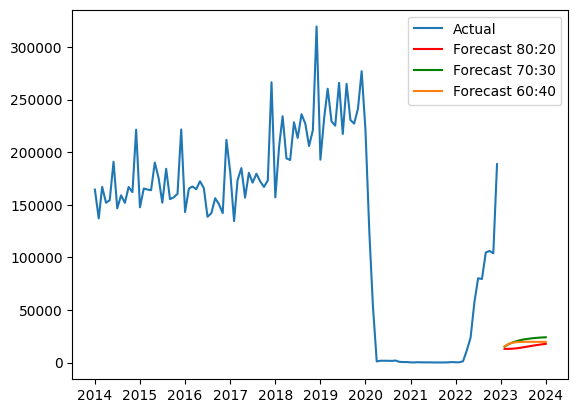

In [21]:
# Plot the results
plt.plot(data.index, data['total_visitor'], label='Actual')
plt.plot(future_dates, y_future_pred_inv, label='Forecast 80:20', color='red')
plt.plot(future_dates_30, y_future_pred_inv_30, label='Forecast 70:30', color='green')
plt.plot(future_dates_40, y_future_pred_inv_40, label='Forecast 60:40')
plt.legend()
plt.show()